In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
df['age'] = pd.to_numeric(df['age'])

In [26]:
df.dropna(inplace=False, axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
df['age'].is_unique
df['age'].isnull().sum()

0

In [5]:
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
for x in df.index:
  if df.loc[x, "age"] > 120:
    df.loc[x, "age"] = 120

In [ ]:
for x in df.index:
  if df.loc[x, "age"] > 120:
    df.drop(x, inplace = True)

In [31]:
df.duplicated()
df.drop_duplicates(inplace = False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df["Calories"].fillna(130, inplace = True)


In [ ]:
df.corr()

# Ploting

<Axes: xlabel='target', ylabel='count'>

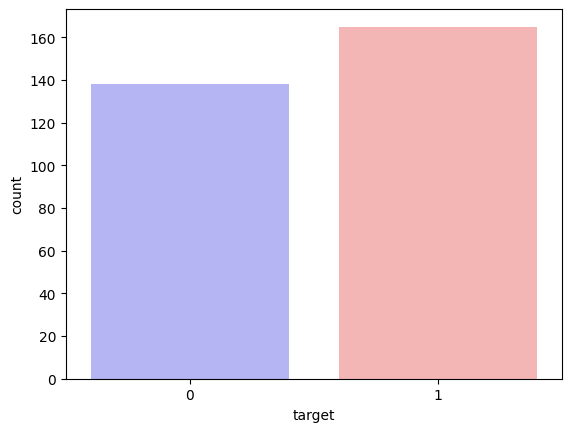

In [6]:
sb.countplot(x='target', data=df , palette='bwr')

# Data Exploration & Analysis

In [7]:
count_of_fit = len(df[df['target']==0])
count_of_heart_disease = len(df[df['target']==1]) 
total_people  = len(df['target'])

In [8]:
print(f'percentage of people Healthy {count_of_fit/total_people*100}')
print(f'percentage of people Having Heart Disease {count_of_heart_disease/total_people*100}')

percentage of people Healthy 45.54455445544555
percentage of people Having Heart Disease 54.45544554455446


In [9]:
df.target.mean()

0.5445544554455446

In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<Axes: xlabel='age'>

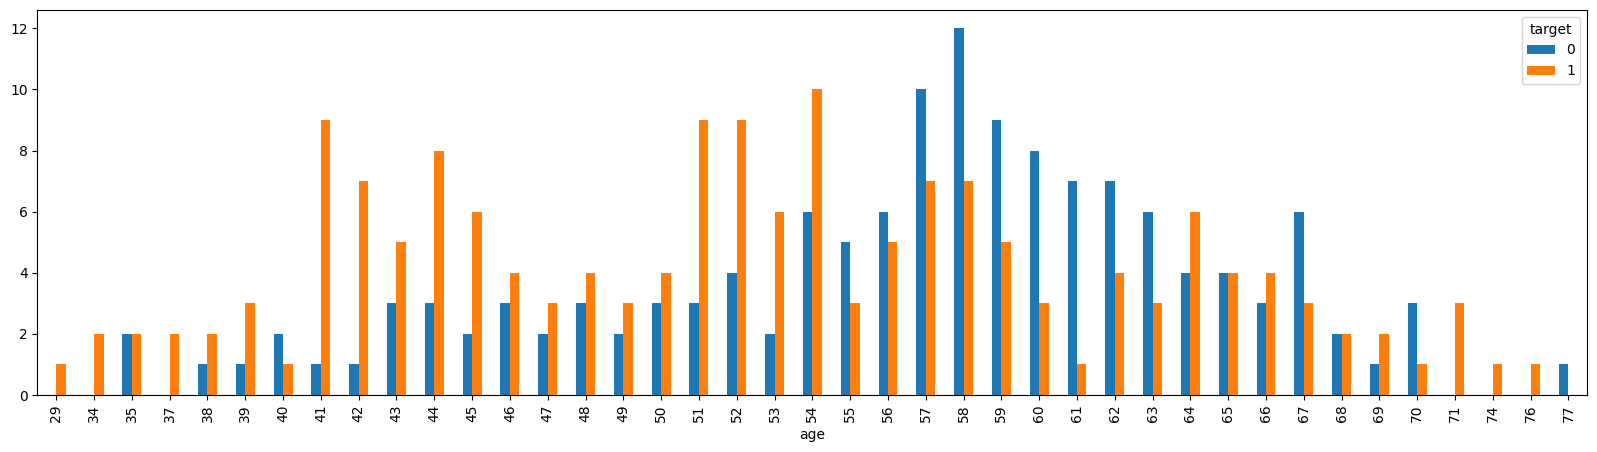

In [35]:
pd.crosstab(df.age , df.target).plot(kind='bar', figsize=(20,5))

In [12]:
df.target.values
x_data = df.drop(['target'] , axis=1)
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
x = df.iloc[: , :-1].values # Not taking Target
y = df.iloc[: , -1].values #O nly Last col ( TARGET )

In [14]:
x_train , x_test , y_train , y_test = train_test_split( x, y , test_size= 0.2 , random_state= 1)

In [15]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



c:\Users\dipan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        30
           1       0.57      0.68      0.62        31

    accuracy                           0.57        61
   macro avg       0.58      0.57      0.57        61
weighted avg       0.58      0.57      0.57        61



In [17]:
x = df.iloc[ :  ,  : -1 ] # Leave the Target Row
y = df.iloc[ :  , -1 ] # Take Only the target Row 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train , y_train)
y_predict = model.predict(x_test)


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report( y_true= y_test , y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        30
           1       0.57      0.68      0.62        31

    accuracy                           0.57        61
   macro avg       0.58      0.57      0.57        61
weighted avg       0.58      0.57      0.57        61



In [21]:
from sklearn.svm import SVC
model_svm = SVC().fit( x_train , y_train )
model_svm_predict = model_svm.predict(x_test)

print(classification_report( y_test , model_svm_predict))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        30
           1       0.54      0.81      0.65        31

    accuracy                           0.56        61
   macro avg       0.57      0.55      0.52        61
weighted avg       0.57      0.56      0.53        61



SyntaxError: invalid syntax (662567788.py, line 2)

In [ ]:
plt.bar(x,height=df['age'])
plt.scatter(x,y)
plt.plot(x,y)

sb.scatterplot(x,y)
sb.boxenplot(data=df)
sb.lineplot(x,y,data=df)


sb.countplot(x='target', data=df , palette='bwr')
sns.pairplot(data=iris, hue="species", diag_kind="kde", palette="husl")
sb.histplot(x="petal_length", data=df)
sb.violinplot(x="species", y="petal_length", data=df)
sns.pairplot(data=iris)
sns.heatmap(flights, cmap='Blues', annot=True, fmt='d')
pd.crosstab(df.age , df.target).plot(kind='bar' , figsize=(20,5))